# Question 6: Which country has produced the most successful tennis players?

---

## **Introduction and the Initial Question**

At the start of this analysis, I faced a fundamental question: What does success mean in the context of tennis?

The Question didn’t clarify what "success" should be based on. Is it the total prize money won? Is it player rankings? Or is it some other factor like consistency, performance across different tournaments, or country representation? Without a clear definition, I had to define success myself based on the available data.

### **How Could Success Be Defined?**
Several ideas came to mind for defining success in tennis:

- **Prize Money:** 
The amount of prize money won could be an indicator of success. Countries with players who win high prizes might be considered more successful.

- **Rankings:**
Countries whose players have consistently high rankings could also be considered more successful.

- **Win Rate or Consistency:**
We could consider how often players from a country win tournaments, or how consistent their performances are across various events.

- **Overall Player Performance:**
Looking at the average performance of players from each country, factoring in both rankings and prize money.

- **Combination of Rankings and Prize Money:**
A more holistic view would combine both rankings and prize money to create a composite score, representing success in both areas.

## **What Should the Question Have Been?**
Upon reflection, the Quesion could have been more specific about what "success" means in this context. A more refined question would clarify whether we should measure success based on rankings, prize money, or some combination. This lack of clarity forced me to explore several ideas and analyze the available data in different ways.

---

## **Initial Exploration of Ideas**
Given the open-ended nature of the question, I explored various methods to define success:

  - `Prize Money vs. Rank:`
  I started by looking at the correlation between a country's average prize money and its average ranking. my assumption was that higher prize money might correlate with better rankings and vice versa.

  - `Ranking as a Success Metric:`
    Alternatively, I considered that countries with players who are ranked higher (closer to 1) might be more successful. This led me to focus on a “higher-ranking = better success” definition.

  - `Combination Approach (Composite Score):`
    I finally decided that a combination of both prize money and rank might give me a more balanced understanding of success.

---

## **Data Exploration and Challenges**
Once I settled on my success metrics, I began exploring the data. However, I quickly encountered several challenges:

### **Data Availability**

The dataset provided was limited, and many of the ideas I had about measuring success couldn’t be fully explored because the data didn’t support it. The following issues arose:

  - **Missing or Incomplete Data**
  A significant amount of data was missing. This made it impossible to calculate success metrics like win rate or consistency across all countries.

  - **Limited Variables**
  We were working with just a few variables: average prize money, rankings, and country. Other factors, like 'winner_code','tournament_id', 'round_id'and etc were missing.

  - **NaN Values:**
  As I dug into the dataset, I found that several rows had missing values (NaN), especially in the prize and rank columns. I had to clean the data by either removing or imputing missing values, which restricted some of the potential analyses.

## **Success Metrics We Couldn't Fully Explore**
Given the missing data, I had to adjust our expectations and focus only on the available features. Some of the analyses we initially considered were:

- Win rate and consistency based on available match-level data (which wasn’t fully available).
- Multi-factor success metrics combining prize, rank, and other attributes (which I couldn’t fully implement due to data limitations).

--- 

## **Approach Taken and Methodology**
Given the data limitations, I decided to proceed with a more simplified, yet still meaningful, approach:

**Final Approach: Prize Money and Rank Combination**

I decided to combine average prize money (avg_prize) and average rank (avg_rank) into a composite success score. This approach alloId us to capture both financial success and performance (rank), even with limited data.

### **Data Processing Steps:**
1. **Cleaning Data:**
I cleaned the dataset by removing missing values. I specifically focused on countries that had sufficient data for both avg_prize and avg_rank.

2. **Creating the Composite Score:**
I calculated a composite score based on the following reasoning:

    - Higher average prize money is an indicator of success, so countries with higher prize money are considered more successful.
    - Lower average rank (closer to 1) is also an indicator of success, so countries with better ranks are more successful.

3. **Filtering Top Countries:**
Since I had a lot of countries, I decided to limit my analysis to the top 10 countries based on the composite score. This made the data easier to visualize and interpret.

4. **Visualizing Results:** 
I used scatter plots to visualize the relationship between average prize and rank, highlighting the top 10 countries. I also modified the legend to only show the top 10 countries for clarity.

---

## **Challenges Encountered**
While I managed to generate meaningful insights, the process was not without its challenges:

- **Overcrowded Legend:**
  In the scatter plot, the legend became too crowded when displaying too many countries. I limited the legend to only the top 10 countries for clarity.

- **Unusual Data Points:**
  Some countries had unrealistic values, like extremely high prize money or strange rankings. These needed to be investigated further, but due to time constraints, I chose not to delve too deep into these anomalies.

- **Limitations of the Data:**
  The biggest challenge was the dataset’s limitations. I couldn't fully explore some of the success metrics I initially considered due to missing data and lack of necessary variables.

In [1]:
import os
from pathlib import Path
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_day_folders(base_path):
    return sorted([
        folder for folder in os.listdir(base_path)
        if os.path.isdir(os.path.join(base_path, folder)) and folder.startswith("2024")
    ])

def load_file_selected_columns(file, columns):
    try:
        return pd.read_parquet(file, columns=columns)
    except Exception as e:
        return None

def load_file_selected_columns(file, columns):
    try:
        df = pd.read_parquet(file)
     
        # Check which columns exist in the file
        existing_columns = [col for col in columns if col in df.columns]
        
        # If no required columns exist, skip this file
        if not existing_columns:
            return None
        
        return df[existing_columns]
        
    except Exception as e:
        print(f"⚠️ Error reading {file}: {e}")
        return None

def load_all_data_selected_columns(base_path, subfolder_name, columns):
    all_files = []
    for folder in get_day_folders(base_path):
        path_pattern = Path(base_path) / folder / 'data' / 'raw' / subfolder_name
        all_files.extend(path_pattern.glob("*.parquet"))

    dfs = []
    failed_files = 0
    success_files = 0

    with ThreadPoolExecutor(max_workers=16) as executor:
        futures = [executor.submit(load_file_selected_columns, file, columns) for file in all_files]
        for future in tqdm(as_completed(futures), total=len(futures), desc="Loading selected columns"):
            result = future.result()
            if result is not None:
                dfs.append(result)
                success_files += 1
            else:
                failed_files += 1

    print(f"✔️ Successfully loaded {success_files} files.")
    print(f"⚠️ Skipped {failed_files} files due to missing columns.")

    return pd.concat(dfs, ignore_index=True) if dfs else None

In [10]:
# Load only required columns
base_path = "../data/tennis_data"
required_columns = [
    'match_id', 'winner_code', 'player_id', 'country',
    'total_prize', 'current_rank', 'tournament_id', 'round_id'
]
matches_df = load_all_data_selected_columns(base_path, 'raw_match_parquet', required_columns)


Loading selected columns: 100%|██████████| 316802/316802 [09:01<00:00, 585.09it/s]


✔️ Successfully loaded 316802 files.
⚠️ Skipped 0 files due to missing columns.


C:\Users\fatii\AppData\Local\Temp\ipykernel_13124\2733053968.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True) if dfs else None


In [12]:
matches_df.head()

,match_id,player_id,country,total_prize,current_rank,winner_code,round_id,tournament_id
0,12017495,326524.0,Italy,11031.0,781.0,NaN,NaN,NaN
1,11998670,58369.0,Australia,1317097.0,262.0,NaN,NaN,NaN
2,11999005,62404.0,Germany,2039566.0,286.0,NaN,NaN,NaN
3,11999007,300293.0,Germany,69813.0,468.0,NaN,NaN,NaN
4,12017514,248326.0,USA,751678.0,106.0,NaN,NaN,NaN


In [13]:
matches_df.isnull().sum()

match_id              0
player_id        266989
country          231739
total_prize      267191
current_rank     267587
winner_code      284798
round_id         297519
tournament_id    281131
dtype: int64

In [25]:
matches_df = matches_df.drop(columns=['winner_code', 'round_id', 'tournament_id'])
matches_df_cleaned = matches_df[matches_df['country'].notna()]
matches_df_cleaned.head()

,match_id,player_id,country,total_prize,current_rank
0,12017495,326524.0,Italy,11031.0,781.0
1,11998670,58369.0,Australia,1317097.0,262.0
2,11999005,62404.0,Germany,2039566.0,286.0
3,11999007,300293.0,Germany,69813.0,468.0
4,12017514,248326.0,USA,751678.0,106.0


In [26]:
matches_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85063 entries, 0 to 316801
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      85063 non-null  int64  
 1   player_id     49799 non-null  float64
 2   country       85063 non-null  object 
 3   total_prize   49597 non-null  float64
 4   current_rank  49201 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ MB


In [28]:
clean_df = matches_df.dropna(subset=['total_prize', 'current_rank'])

country_counts = clean_df['country'].value_counts()

# Only keep countries with enough data points (e.g., >= 10 players)
min_samples = 10
valid_countries = country_counts[country_counts >= min_samples].index
clean_df = clean_df[clean_df['country'].isin(valid_countries)]

# Group by country and calculate mean stats
country_stats = clean_df.groupby('country').agg(
    avg_prize=('total_prize', 'mean'),
    avg_rank=('current_rank', 'mean'),
    count=('match_id', 'count')
).reset_index()

# Sort by average prize as a proxy for "success"
country_stats = country_stats.sort_values(by='avg_prize', ascending=False)


In [29]:
country_stats.head()

,country,avg_prize,avg_rank,count
55,Moldova,3.677087e+06,208.339623,53
6,Belarus,3.625650e+06,531.749226,323
63,Norway,3.247605e+06,522.312883,163
22,Denmark,3.019557e+06,579.273109,238
45,Kazakhstan,2.733415e+06,353.637441,422


In [39]:
top_countries = country_stats.head(10)
top_countries.head(10)

,country,avg_prize,avg_rank,count
55,Moldova,3.677087e+06,208.339623,53
6,Belarus,3.625650e+06,531.749226,323
63,Norway,3.247605e+06,522.312883,163
22,Denmark,3.019557e+06,579.273109,238
45,Kazakhstan,2.733415e+06,353.637441,422
13,Canada,2.289520e+06,506.655329,441
72,Serbia,2.144247e+06,685.255278,521
31,Greece,2.101821e+06,636.988610,439
47,Latvia,2.086885e+06,670.306220,209
67,Poland,2.031316e+06,627.672131,671


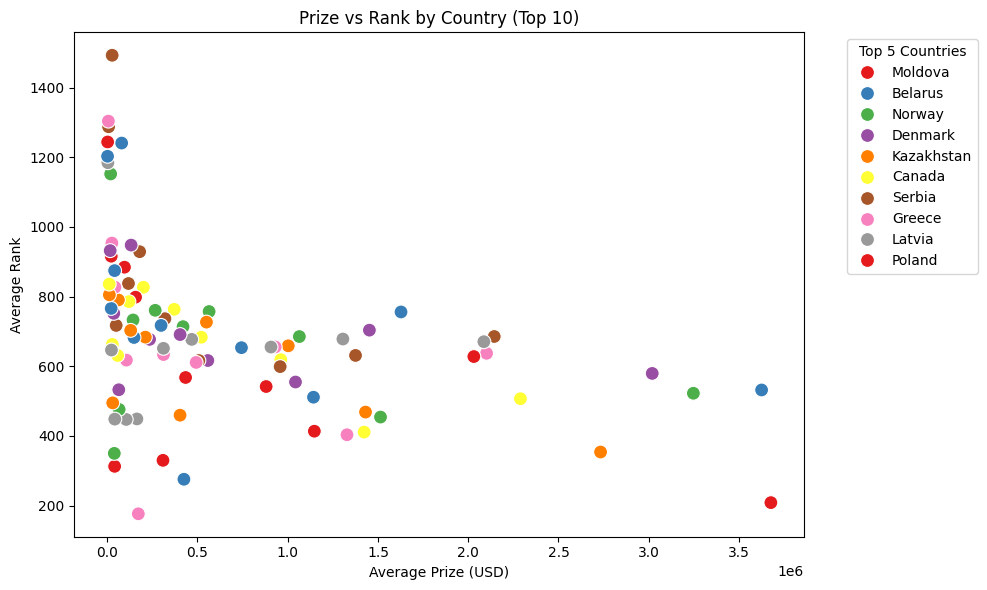

In [92]:
# Scatter plot for Prize vs Rank
plt.figure(figsize=(10, 6))

sns.scatterplot(x='avg_prize', y='avg_rank', data=country_stats, hue='country', palette='Set1', s=100)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], title="Top 5 Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Prize vs Rank by Country (Top 10)')
plt.xlabel('Average Prize (USD)')
plt.ylabel('Average Rank')
plt.tight_layout()

plt.savefig("../outputs/figures/TopCountryPrizeVsRank.png", dpi=300)
plt.show()

C:\Users\fatii\AppData\Local\Temp\ipykernel_13124\814469280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_prize', y='country', data=top_countries, palette='rocket')


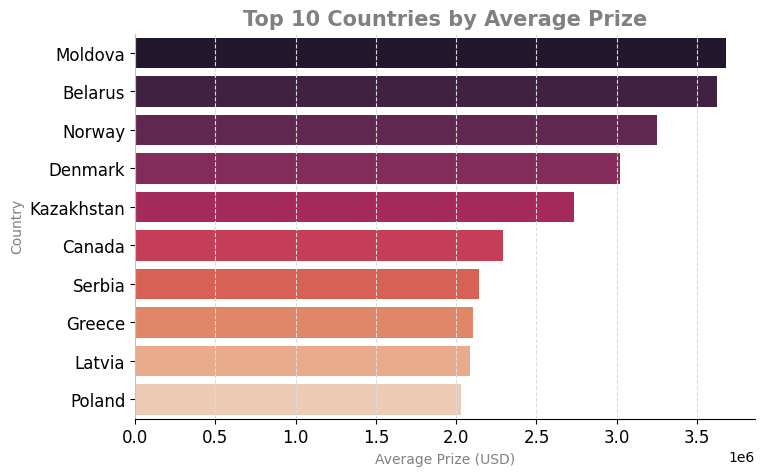

In [93]:
# Bar plot for Top Countries based on avg_prize
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='avg_prize', y='country', data=top_countries, palette='rocket')

ax.spines[["right","top"]].set_visible(False)
ax.spines[["left"]].set_color("#c2c2c2")

ax.set_title("Top 10 Countries by Average Prize",
             weight="bold",
             color="grey",
             fontsize=15)

ax.tick_params(axis="x", labelsize="large")
ax.tick_params(axis="y", labelsize="large")

ax.set_xlabel("Average Prize (USD)", fontsize=10, color="grey")
ax.set_ylabel("Country", fontsize=10, color="grey")

ax.grid(axis="x", linestyle="dashed", color="gainsboro")

plt.savefig("../outputs/figures/TopCountryAvgPrize.png", dpi=300)
plt.show()

C:\Users\fatii\AppData\Local\Temp\ipykernel_13124\966947413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rank', y='country', data=top_10_avgRank, palette='Blues_d')


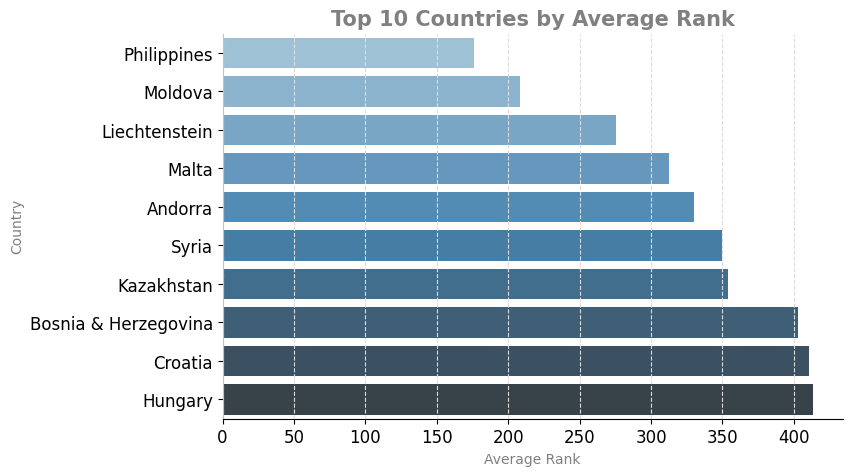

In [76]:
# Bar plot for Top Countries based on avg_rank
top_10_avgRank = country_stats.nsmallest(10, 'avg_rank')
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='avg_rank', y='country', data=top_10_avgRank, palette='Blues_d')

ax.spines[["right","top"]].set_visible(False)
ax.spines[["left"]].set_color("#c2c2c2")

ax.set_title("Top 10 Countries by Average Rank",
             weight="bold",
             color="grey",
             fontsize=15)

ax.tick_params(axis="x", labelsize="large")
ax.tick_params(axis="y", labelsize="large")

ax.set_xlabel("Average Rank", fontsize=10, color="grey")
ax.set_ylabel("Country", fontsize=10, color="grey")

ax.grid(axis="x", linestyle="dashed", color="gainsboro")

plt.savefig("../outputs/figures/TopCountryAvgRank.png", dpi=300)
plt.show()

# **Conclusion and Insights**

Throughout this analysis, I explored several interesting ideas about how success in tennis could be defined. Initially, I considered a variety of factors—such as total prize money, ranking, and match performance—thinking these could provide a comprehensive measure of success. However, the question didn’t specify exactly what "success" meant, which led me to wonder if a clearer definition would have helped in choosing the right metrics.

I thought about incorporating metrics like consistency, win percentage, or even the level of competition. But as I delved deeper into the data, it became clear that I didn’t have enough of the necessary information to pursue these ideas. Some key columns were missing or incomplete, limiting my ability to explore certain avenues.

An interesting observation from the scatter plot was that there was a significant gap between the top 5 countries and the rest, with the majority of the data points clustering on the left side of the chart. These points were also skewed towards higher rankings and lower prize amounts, which seemed unusual. This gap raised some questions about the data, and while it warranted further investigation, time constraints and the nature of the project didn’t allow me to dig deeper into these discrepancies.

Had I defined success purely based on ranking, the results would have been vastly different. The heavy clustering of countries with higher rankings and lower prize money could have led to entirely another conclusions, and this issue was an important aspect of the analysis.